# calculus_sim_waterTanks_Kp_controller

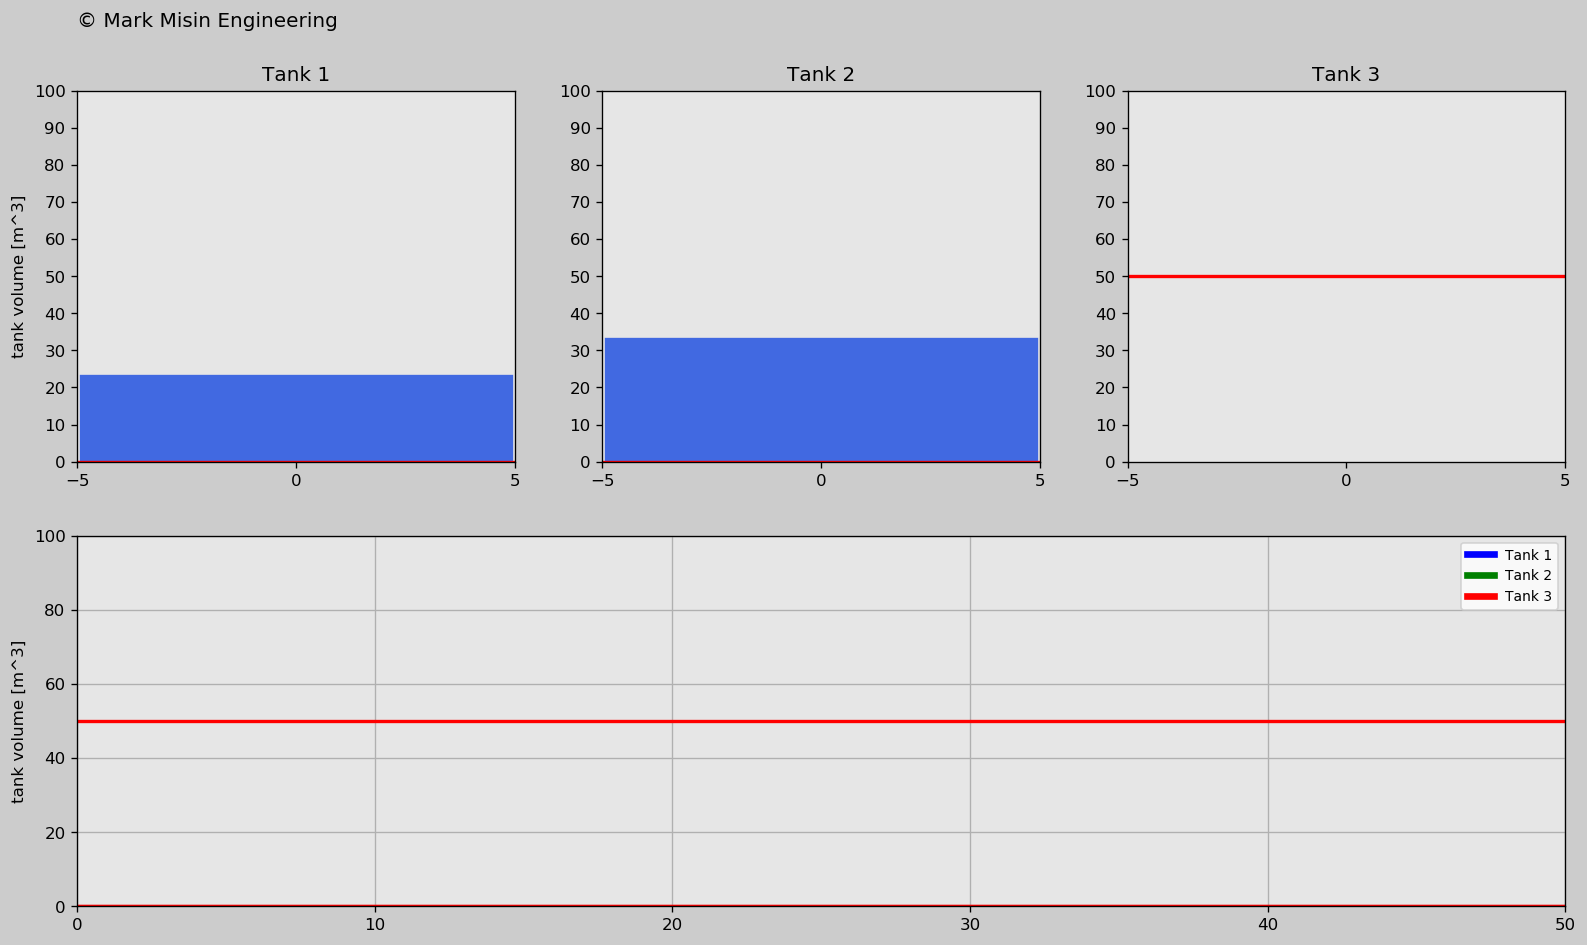

In [1]:
'''
LICENSE AGREEMENT

In relation to this Python file:

1. Copyright of this Python file is owned by the author: Mark Misin

2. This Python code can be freely used and distributed

3. The copyright label in this Python file such as

copyright=ax_main.text(x,y,'© Mark Misin Engineering',size=z)

that indicate that the Copyright is owned by Mark Misin MUST NOT be removed.

WARRANTY DISCLAIMER!

This Python file comes with absolutely NO WARRANTY! In no event can the author of this Python file be held responsible for whatever happens in relation to this Python file. For example, if there is a bug in the code and because of that a project, invention, or whatever it is used for fails - the author is NOT RESPONSIBLE!
'''

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
# The uncommented sections are an attempt to control the simulation from a keyboard.
# Unsuccessful


# import curses

# # get the curses screen window
# screen=curses.initscr()
#
# # turn off input echoing
# curses.noecho()
#
# # respond to keys immediately (don't wait for enter)
# curses.cbreak()
#
# # map arrow keys to special values
# screen.keypad(True)
#
# char=screen.getch()

# Make a proportianl controller (Kp)

radius=5
bottom=0
final_volume=100
dVol=10
width_ratio=1
dt=0.04
t0=0
t_end=50
frame_amount=int(t_end/dt)
t=np.arange(t0,t_end+dt,dt)
density_water=1000  # kg/m^3

Kp1=1000
Kp2=1000
Kp3=5000

vol_o1_i=30
vol_r1_i=70
vol_o2_i=40
vol_r2_i=10
vol_o3_i=50
vol_r3_i=20

vol_r1=np.zeros(len(t))
volume_Tank1=np.zeros(len(t))
volume_Tank1[0]=vol_o1_i
error1=np.zeros(len(t))
m_dot1=Kp1*error1

vol_r2=np.zeros(len(t))
volume_Tank2=np.zeros(len(t))
volume_Tank2[0]=vol_o2_i
error2=np.zeros(len(t))
m_dot2=Kp2*error2

vol_r3=vol_o3_i+1*t*np.sin(2*np.pi*(0.005*t)*t)
volume_Tank3=np.zeros(len(t))
error3=np.zeros(len(t))
m_dot3=Kp3*error3

simple_controller=100
for i in range(1,len(t)):
    if i<300:
        vol_r1[i]=vol_r1_i
        vol_r2[i]=vol_r2_i+3*t[i]
    elif i<600:
        vol_r1[i]=20
        vol_r2[i]=vol_r2_i+3*t[i]
        time_temp2=t[i]
        temp2=vol_r2[i]
    elif i<900:
        vol_r1[i]=90
        vol_r2[i]=temp2-1*(t[i]-time_temp2)
    else:
        vol_r1[i]=50
        vol_r2[i]=temp2-1*(t[i]-time_temp2)

    error1[i-1]=vol_r1[i-1]-volume_Tank1[i-1]
    error2[i-1]=vol_r2[i-1]-volume_Tank2[i-1]
    error3[i-1]=vol_r3[i-1]-volume_Tank3[i-1]

    # if error1[i-1]<0:
    #     m_dot1[i]=-simple_controller
    # elif error1[i-1]>0:
    #     m_dot1[i]=simple_controller
    # else:
    #     m_dot1[i]=0

    m_dot1[i]=Kp1*error1[i-1]
    m_dot2[i]=Kp2*error2[i-1]
    m_dot3[i]=Kp3*error3[i-1]
    volume_Tank1[i]=volume_Tank1[i-1]+(m_dot1[i-1]+m_dot1[i])/(2*density_water)*(dt)
    volume_Tank2[i]=volume_Tank2[i-1]+(m_dot2[i-1]+m_dot2[i])/(2*density_water)*(dt)
    volume_Tank3[i]=volume_Tank3[i-1]+(m_dot3[i-1]+m_dot3[i])/(2*density_water)*(dt)
vol_r1_2=vol_r1
vol_r2_2=vol_r2
vol_r3_2=vol_r3


def update_plot(num):
    if num>=len(volume_Tank1):
        num=len(volume_Tank1)-1


    # if char==curses.KEY_UP:
    #     vol_r1_2[num]=vol_r1_2[num]+2
    #     error1[num-1]=vol_r1_2[num-1]-volume_Tank1[num-1]
    #     m_dot1[num-1]=Kp1*error1[num-1]
    #     volume_Tank1[num]=volume_Tank1[num-1]+m_dot1[num-1]*(dt)
    # elif char==curses.KEY_DOWN:
    #     vol_r1_2[num]=10
    #     error1[num-1]=vol_r1_2[num-1]-volume_Tank1[num-1]
    #     m_dot1[num-1]=Kp1*error1[num-1]
    #     volume_Tank1[num]=volume_Tank1[num-1]+m_dot1[num-1]*(dt)

    tank_12.set_data([0,0],[-65,volume_Tank1[num]-65])
    tnk_1.set_data(t[0:num],volume_Tank1[0:num])
    vol_r1.set_data([-radius*width_ratio,radius*width_ratio],[vol_r1_2[num],vol_r1_2[num]])
    vol_r1_line.set_data([t0,t_end],[vol_r1_2[num],vol_r1_2[num]])

    tank_22.set_data([0,0],[-65,volume_Tank2[num]-65])
    tnk_2.set_data(t[0:num],volume_Tank2[0:num])
    vol_r2.set_data([-radius*width_ratio,radius*width_ratio],[vol_r2_2[num],vol_r2_2[num]])
    vol_r2_line.set_data([t0,t_end],[vol_r2_2[num],vol_r2_2[num]])
    
    tank_32.set_data([0,0],[-65,volume_Tank3[num]-65])
    tnk_3.set_data(t[0:num],volume_Tank3[0:num])
    vol_r3.set_data([-radius*width_ratio,radius*width_ratio],[vol_r3_2[num],vol_r3_2[num]])
    vol_r3_line.set_data([t0,t_end],[vol_r3_2[num],vol_r3_2[num]])


    return  vol_r1,tank_12,vol_r1_line,tnk_1,\
            vol_r2,tank_22,vol_r2_line,tnk_2,\
            vol_r3,tank_32,vol_r3_line,tnk_3,\

    # return vol_r1,tank_12,tnk_1,vol_r1_line\

# Set up your figure properties20
fig=plt.figure(figsize=(16,9),dpi=120,facecolor=(0.8,0.8,0.8))
gs=gridspec.GridSpec(2,3)

# Create object for Tank1
ax0=fig.add_subplot(gs[0,0],facecolor=(0.9,0.9,0.9))
vol_r1,=ax0.plot([],[],'r',linewidth=2)
tank_12,=ax0.plot([],[],'royalblue',linewidth=260,zorder=0)
plt.xlim(-radius*width_ratio,radius*width_ratio)
plt.ylim(bottom,final_volume)
plt.xticks(np.arange(-radius,radius+1,radius))
plt.yticks(np.arange(bottom,final_volume+dVol,dVol))
plt.ylabel('tank volume [m^3]')
plt.title('Tank 1')
copyright=ax0.text(-radius*width_ratio,(final_volume+10)*3.2/3,'© Mark Misin Engineering',size=12)

# Create object for Tank2
ax1=fig.add_subplot(gs[0,1],facecolor=(0.9,0.9,0.9))
vol_r2,=ax1.plot([],[],'r',linewidth=2)
tank_22,=ax1.plot([],[],'royalblue',linewidth=260,zorder=0)
plt.xlim(-radius*width_ratio,radius*width_ratio)
plt.ylim(bottom,final_volume)
plt.xticks(np.arange(-radius,radius+1,radius))
plt.yticks(np.arange(bottom,final_volume+dVol,dVol))
plt.title('Tank 2')


# Create object for Tank3
ax2=fig.add_subplot(gs[0,2],facecolor=(0.9,0.9,0.9))
vol_r3,=ax2.plot([],[],'r',linewidth=2)
tank_32,=ax2.plot([],[],'royalblue',linewidth=260,zorder=0)
plt.xlim(-radius*width_ratio,radius*width_ratio)
plt.ylim(bottom,final_volume)
plt.xticks(np.arange(-radius,radius+1,radius))
plt.yticks(np.arange(bottom,final_volume+dVol,dVol))
plt.title('Tank 3')

# Create volume function
ax3=fig.add_subplot(gs[1,:], facecolor=(0.9,0.9,0.9))
vol_r1_line,=ax3.plot([],[],'r',linewidth=2)
vol_r2_line,=ax3.plot([],[],'r',linewidth=2)
vol_r3_line,=ax3.plot([],[],'r',linewidth=2)
tnk_1,=ax3.plot([],[],'blue',linewidth=4,label='Tank 1')
tnk_2,=ax3.plot([],[],'green',linewidth=4,label='Tank 2')
tnk_3,=ax3.plot([],[],'red',linewidth=4,label='Tank 3')
plt.xlim(0,t_end)
plt.ylim(0,final_volume)
plt.ylabel('tank volume [m^3]')
plt.grid(True)
plt.legend(loc='upper right',fontsize='small')

plane_ani=animation.FuncAnimation(fig,update_plot,
    frames=frame_amount,interval=20,repeat=True,blit=True)
plt.show()
# curses.nocbreak()
# screen.keypad(0)
# curses.echo()
# curses.endwin()


<Figure size 1920x1080 with 0 Axes>

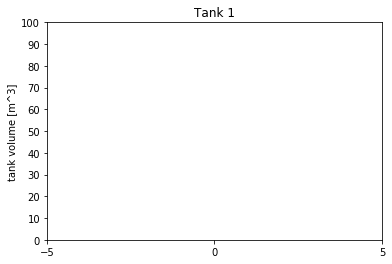

Text(0.5, 1.0, 'Tank 2')

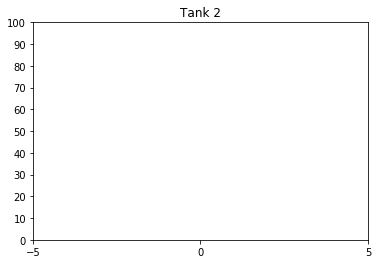

Text(0.5, 1.0, 'Tank 3')

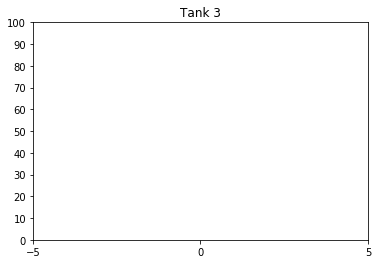

No handles with labels found to put in legend.


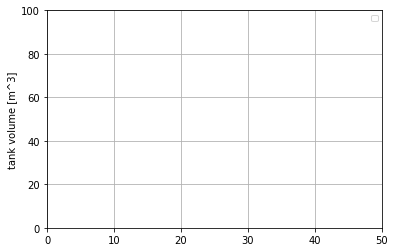